In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
path = '../resources/pokedex_(Update.04.20).csv'

pokedex = pd.DataFrame(pd.read_csv(path))

pokedex.head()

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,is_sub_legendary,is_legendary,is_mythical,species,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,0,1,Bulbasaur,Bisasam,フシギダネ (Fushigidane),1,0,0,0,Seed Pokémon,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,1,2,Ivysaur,Bisaknosp,フシギソウ (Fushigisou),1,0,0,0,Seed Pokémon,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,2,3,Venusaur,Bisaflor,フシギバナ (Fushigibana),1,0,0,0,Seed Pokémon,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,3,Mega Venusaur,Bisaflor,フシギバナ (Fushigibana),1,0,0,0,Seed Pokémon,...,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,4,Charmander,Glumanda,ヒトカゲ (Hitokage),1,0,0,0,Lizard Pokémon,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [21]:
gen_count = pokedex.groupby('generation').size()
gen_count

generation
1    192
2    107
3    165
4    121
5    171
6     85
7     99
8     88
dtype: int64

Text(0, 0.5, 'Number of Pokemon')

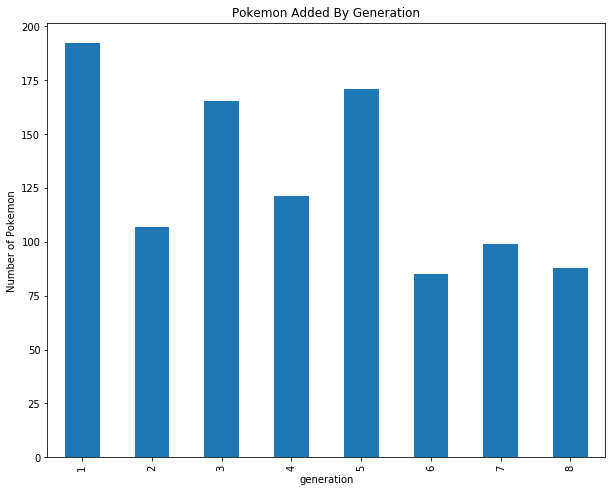

In [32]:
gen_count.plot.bar(title='Pokemon Added By Generation', figsize=(10,8))
plt.ylabel('Number of Pokemon')

In [26]:
type_count = pokedex.groupby('type_1').size().sort_values(ascending=False)
type_count

type_1
Water       134
Normal      115
Grass        91
Bug          81
Psychic      76
Fire         65
Electric     61
Rock         60
Dark         43
Ground       41
Ghost        41
Dragon       40
Poison       39
Fighting     38
Ice          36
Steel        36
Fairy        22
Flying        8
dtype: int64

Text(0, 0.5, 'Number of Pokemon')

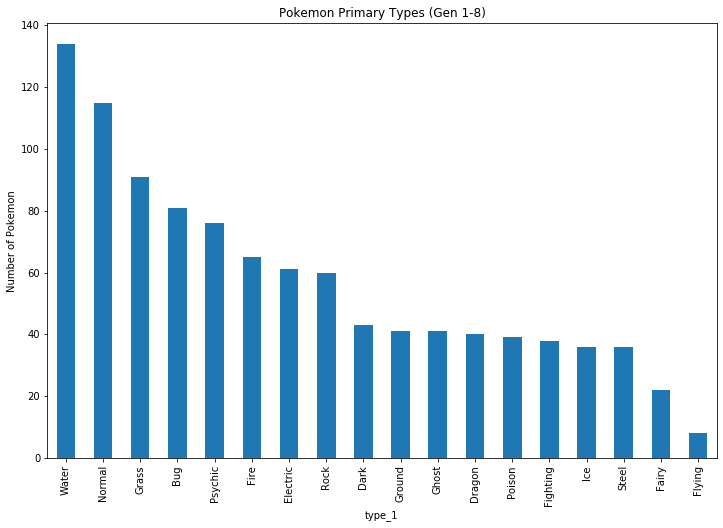

In [30]:
type_count.plot.bar(figsize=(12,8), title='Pokemon Primary Types (Gen 1-8)')
plt.ylabel('Number of Pokemon')

In [59]:
gen_type = pokedex.groupby(['type_1', 'generation'])['name'].count().unstack('generation').fillna(0)
gen_type

generation,1,2,3,4,5,6,7,8
type_1,,,,,,,,
Bug,14.0,12.0,12.0,10.0,18.0,3.0,9.0,3.0
Dark,4.0,5.0,8.0,3.0,13.0,3.0,1.0,6.0
Dragon,3.0,0.0,12.0,4.0,9.0,6.0,3.0,3.0
Electric,11.0,7.0,5.0,12.0,8.0,3.0,5.0,10.0
Fairy,2.0,5.0,0.0,1.0,0.0,9.0,1.0,4.0
Fighting,8.0,2.0,5.0,3.0,7.0,3.0,4.0,6.0
Fire,15.0,8.0,9.0,5.0,9.0,8.0,6.0,5.0
Flying,0.0,0.0,0.0,0.0,2.0,2.0,0.0,4.0
Ghost,4.0,2.0,5.0,7.0,5.0,10.0,5.0,3.0


Text(0.5, 0, 'Primary Type')

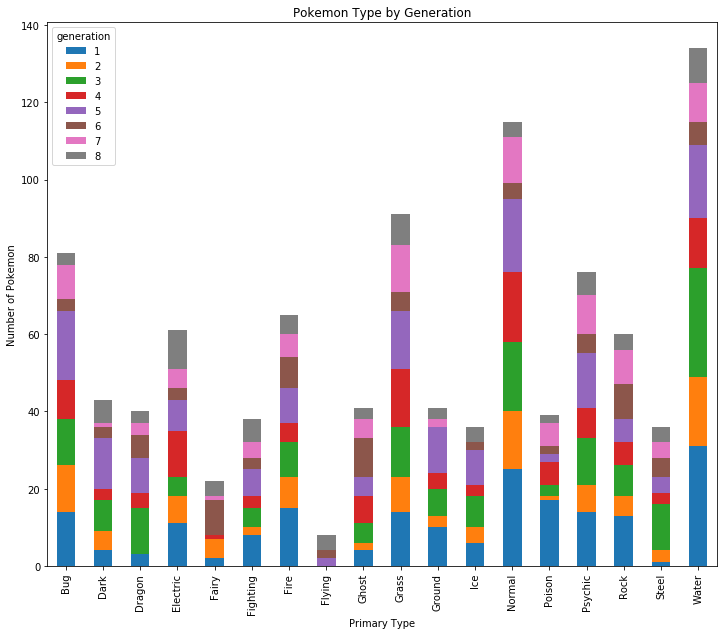

In [60]:
gen_type.plot.bar(stacked=True, figsize=(12,10), title='Pokemon Type by Generation')
plt.ylabel('Number of Pokemon')
plt.xlabel('Primary Type')

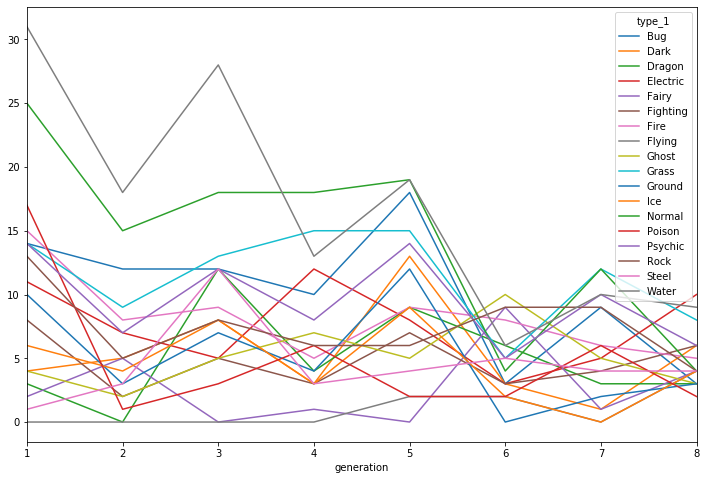

In [62]:
flipped_gen_type = gen_type.T
flipped_gen_type.plot.line(figsize=(12,8))

Enter a stat: attack
Enter a stat to compare attack to: defense


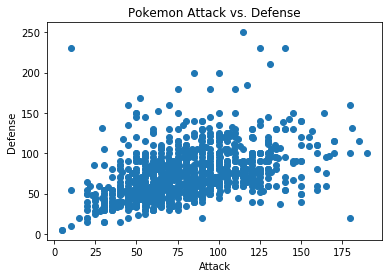

In [77]:
def scatter_plot():
    # A fuction to create scatter plots from Pokedex data
    
    x = (input('Enter a stat: ').lower())
    y = (input(f'Enter a stat to compare {x} to: ').lower())
    
    plt.scatter(pokedex[x],pokedex[y])
    plt.title(f'Pokemon {x.title()} vs. {y.title()}')
    plt.xlabel(x.title())
    plt.ylabel(y.title())

scatter_plot()

Enter a stat: weight_kg
Enter a stat to compare weight_kg to: attack


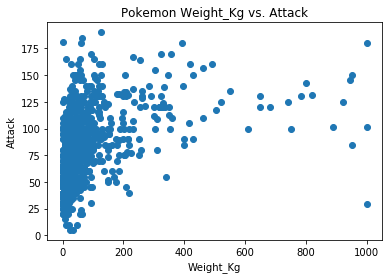

In [78]:
scatter_plot()

Enter a stat: weight_kg
Enter a stat to compare weight_kg to: defense


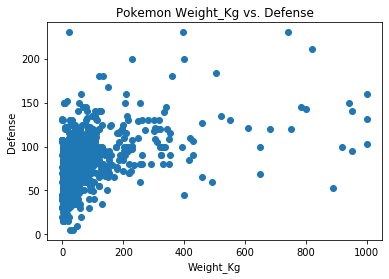

In [79]:
scatter_plot()

Enter a stat: height_m
Enter a stat to compare height_m to: attack


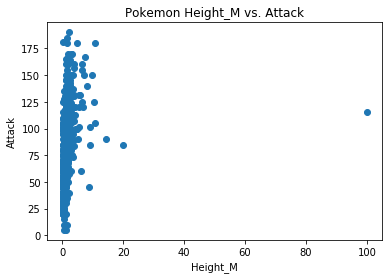

In [80]:
scatter_plot()

In [81]:
pokedex.loc[pokedex['height_m']>80]

,Unnamed: 0,pokedex_number,name,german_name,japanese_name,generation,is_sub_legendary,is_legendary,is_mythical,species,...,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
1027,1027,890,Eternatus Eternamax,NaN,NaN,8,0,1,0,Gigantic Pokémon,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0
